# Boston House Price Prediction
---

### Problem Statement
**The problem on hand is to predict the housing prices** of a town or a suburb based on the features of the locality provided. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### 1. Import Python libraries

In [1]:
# import libraries for data manipulation and math calculations
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import libraries for data wrangling
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# import libraries for building linear regression model using statsmodel and statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels import api as sm

# import libraries for model building, training, and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import svm

# import ensemble libraries
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# import sklear libraries for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# import warnings library to silence some obsolete elements, such as keyword, function or class, etc.
import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset

In [2]:
# The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 
# Each record in the database describes a Boston suburb or town house.

df = pd.read_csv("./dataset/boston_dataset.csv")
df.head()

# Dataset attributes (columns) information (in order):

#   CRIM:       per capita crime rate by town
#   ZN:         proportion of residential land zoned for lots over 25,000 sq.ft.
#   INDUS:      proportion of non-retail business acres per town
#   CHAS:       Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#   NOX:        nitric oxides concentration (parts per 10 million)
#   RM:         average number of rooms per dwelling
#   AGE:        proportion of owner-occupied units built prior to 1940
#   DIS:        weighted distances to five Boston employment centres
#   RAD:        index of accessibility to radial highways
#   TAX:        full-value property-tax rate per 10,000 dollars
#   PTRATIO:    pupil-teacher ratio by town
#   LSTAT:      %lower status of the population
#   MEDV:       Median value of owner-occupied homes in 1000 dollars



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Comment:** 

The data set contains thirteen (13) columns, which are numerical values. 
* Column named 'MEDV', is the target (dependent variable) 
* The rest of the columns (independent variables) will serve as predictors.  

### 3. Exploratory Data Analysis

#### *a. Dataset description*

In [3]:
# info(): prints information about a DataFrame including the index dtype and columns, 
# non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Comment:** 

The data set characteristics are:
1. Type = Pandas DataFrame 
2. Number of columns = Total 13  (10 features are type float and 3 features are type int)
3. Number of entries = 506 entries with no null values on any of the features (columns)



In [4]:
# describe(): Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset’s distribution, excluding NaN values.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Comments:** 

The first thing to notice is how different ranges/scales are for each feature. This will have to be addressed as Machine Learning models won’t work properly under these conditions.

* **CRIM:** A percentage value with a mean 3.6 (+/- 8.6) and a similar 75th percentile, indicates that most of sample zones are concentrated around this figure. This dataset has values up to 88.97, showing areas with higher criminality.
* **CHAS:** mean value and up to 75th percentile is 0. This indicates that most of these areas are away from the Charles River.
* **RM:** the average/mean number of rooms is 6.28 for dwelling in the sample areas. 
* **TAX:** mean is USD 408.23 for every USD 10,000. Values range from USD 187 to USD 711, so there are some areas with more expensive properties that the average.
* The mean for **MEDV** is approx. USD 22,500,  whereas the value may range from USD 5,000 up to USD 50,000 

In [5]:
# np.ptp(): Range of values (maximum - minimum) along an axis. 
# Peak to Peak units data range by column

np.ptp(df, axis = 0)

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
LSTAT       36.24000
MEDV        45.00000
dtype: float64

**Comments:**

Here we confirm the variability of ranges between datapoints. i.e., 

* **CHAS** is a categorical variable whose values are 0 or 1, while 
* **TAX** is a continuous variable with a range of 524, from 187 to 711.

This difference in ranges negatively affect the performance of regression functions thus their ability to predict accurate results. Normalization/Standardization will be implemented to address this issue.

#### *b. Univariate analysis*

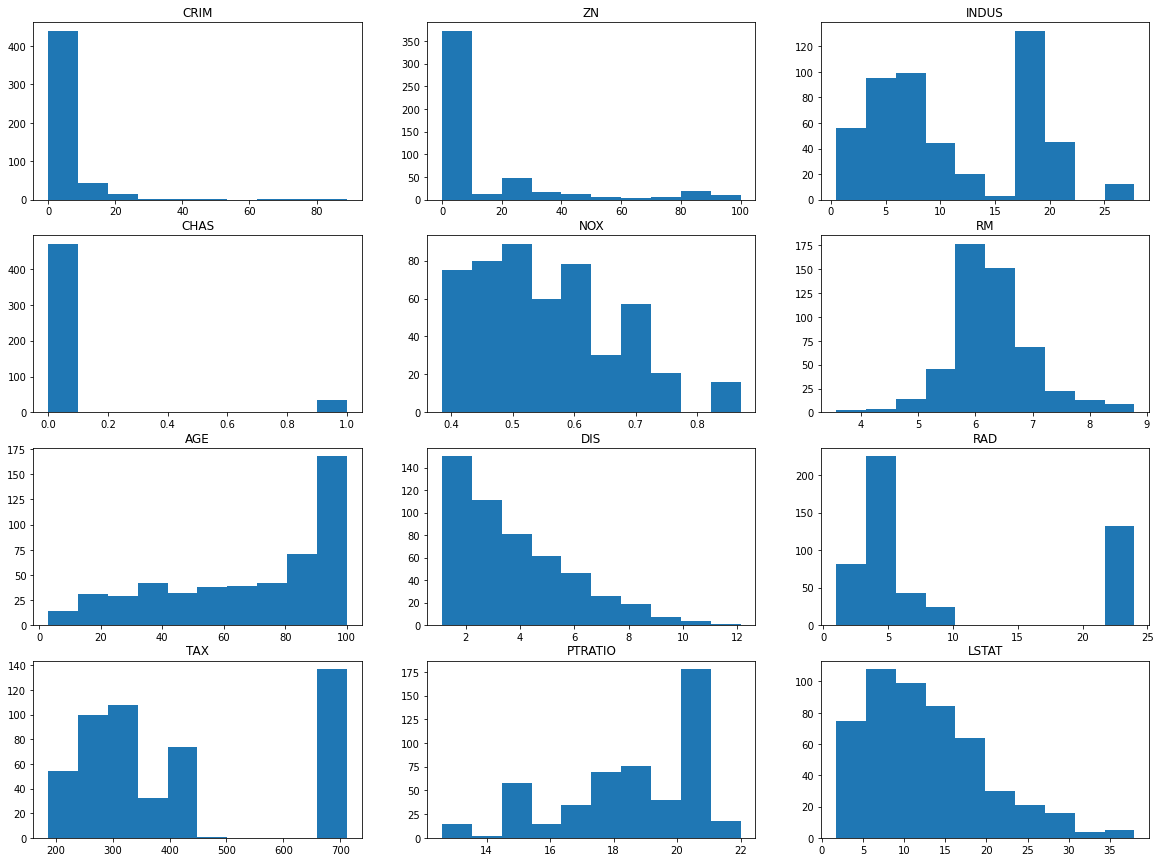

In [6]:
# Frequency Distribution - Histograms
# --------------------------------------
# At a glance" picture of historical patterns for every feature. these charts will simplify
# the observation of simetry trends, deviations/outliers and equal distribution of the data points.

def plot_histogram(df, nrow, ncol):

    col = 0
    fig, axs = plt.subplots(nrow, ncol, figsize=(20,15))
    for i in range(4):
        for j in range(3):
            axs[i, j].hist(df.iloc[:,col], bins = 10)
            axs[i, j].set_title(df.iloc[:,col].name)
            col += 1

plot_histogram(df, 4, 3)

**Comments:**

* **RM** shows a normal distribution, meaning that there is an even number of rooms around the mean which is 6 per dwelling
* **CRIM, ZN, NOX, DIS, LSTAT, CHAS** are positively skewed. This suggests that most of the areas have low crime rates, (ZN) most residential plots are under the area of 25,000 sq. ft. (NOX) concentration is low in most suburbs, (DIS) they are close to employment centers, (LSTAT) low status population is also small in these areas and, (CHAS) they are not close to Charles River
* **AGE, PTRATIO** are negatively skewed. This shows that most old units (built prior to 1940) are occupied by owners and, ratio teacher-student tends to be 1:18 or higher
* **INDUS, RAD, TAX** have a binomial distribution indicating that (INDUS) proportion of non-retail business acres has a split distribution, 11 in some areas and close to 20 in others. (RAD) has and index of 9.5 for some areas and higher for some other areas and, (TAX) is also split around 300 for some suburbs and close 700 for other group.


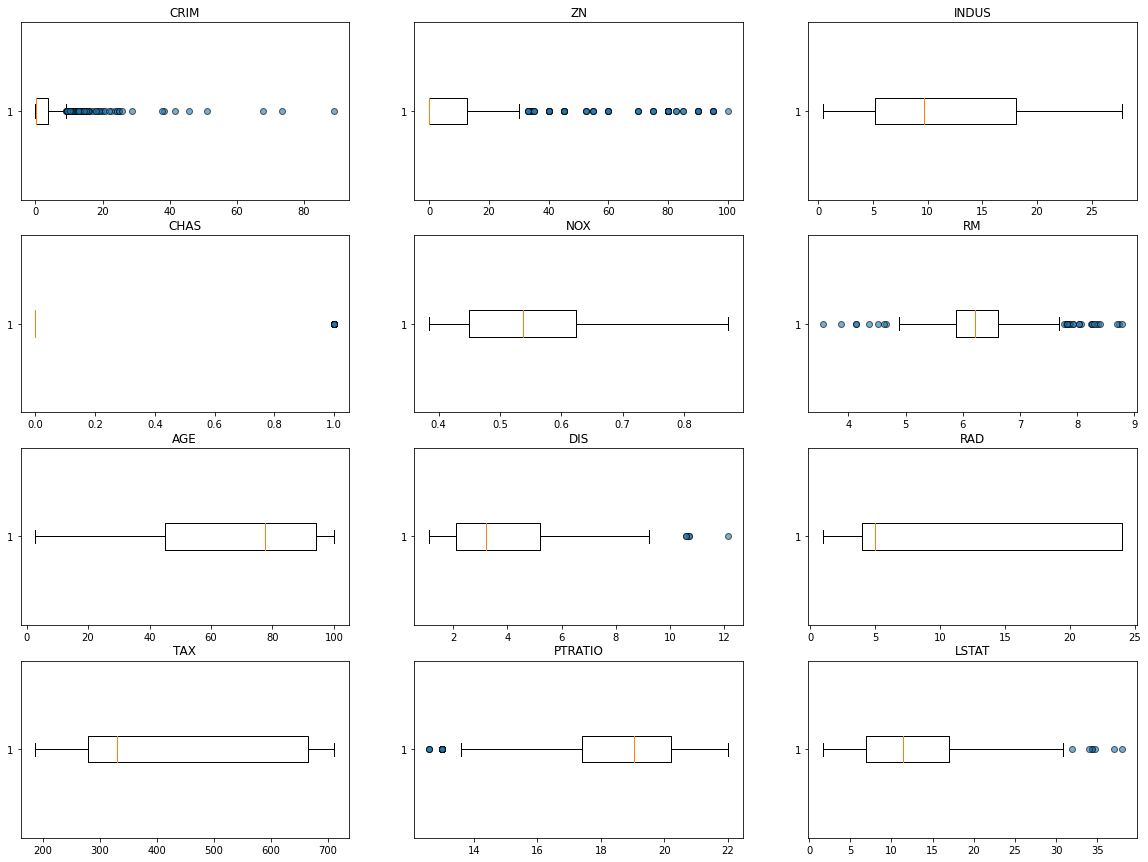

In [7]:
# Outliers visualization
# --------------------------------------
# An Outlier is an observation significantly different from all other observations. 
# They can drastically change the results of the data analysis and statistical modeling.
#   i.e:
#   1. It increases the error variance and reduces the power of statistical tests
#   2. If the outliers are non-randomly distributed, they can decrease normality
#   3. They can bias or influence estimates that may be of substantive interest
#   4. They can also impact the basic assumption of Regression, ANOVA and other 
#      statistical model assumptions

def plot_boxplot(df, nrow, ncol):
    
    col = 0
    fig, axs = plt.subplots(nrow, ncol, figsize=(20,15))
    outliers = dict(markerfacecolor = 'C0', marker = 'o', alpha = 0.6)
    for i in range(nrow):
        for j in range(ncol):
            axs[i, j].boxplot(df.iloc[:,col], vert = False, flierprops = outliers)
            axs[i, j].set_title(df.iloc[:,col].name)
            col += 1

plot_boxplot(df, 4, 3)

**Comments:**

Above it may be seen that predictors **CRIM, ZN, CHAS, RM, DIS, PTRATIO and LSTAT** have outliers. This situation will be reviewed and addressed in the Data Preprocessing section below.

#### *c. Bivariate analysis*

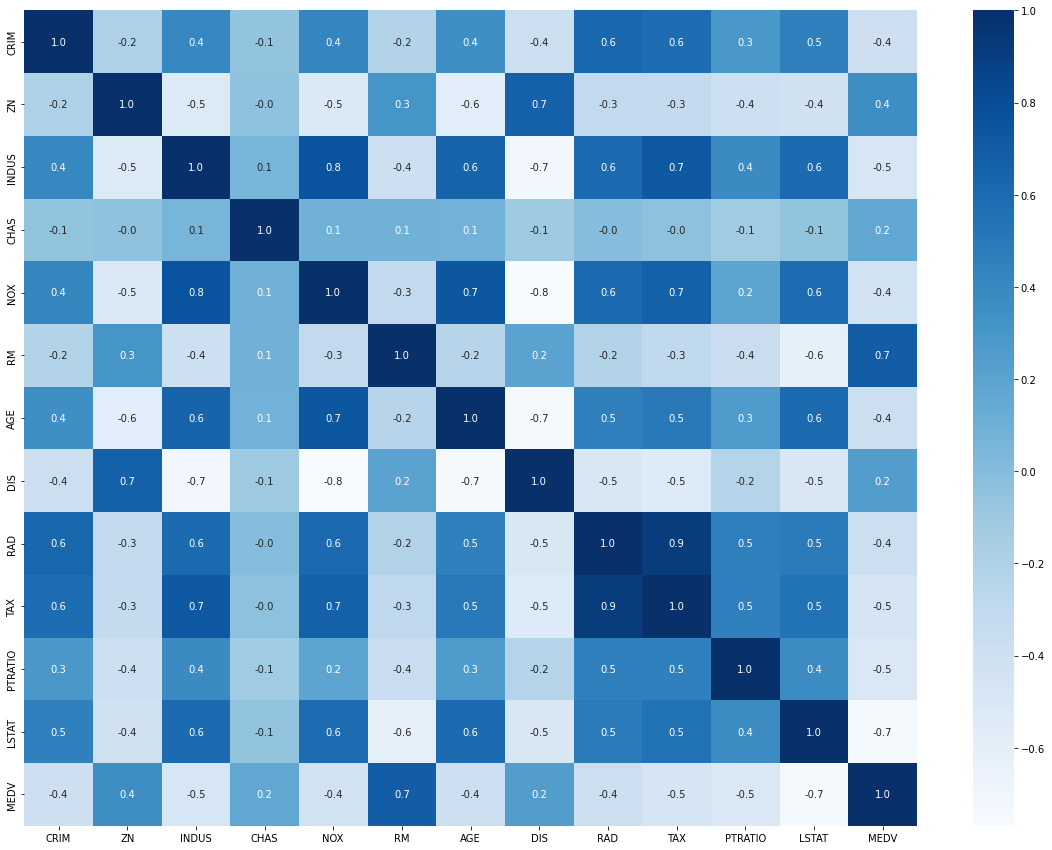

In [8]:
# Correlation 
# --------------------------------------
# Statistical technique that shows how two variables are related. It is used to find the pairwise 
# correlation of all columns in the dataframe. Any non-numeric data type columns in the 
# dataframe is ignored.

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, fmt='.1f', cmap = 'Blues')
plt.show()

**Comments:**

Predictors TAX and RAD show a very strong **positive** correlation saying that if a suburb is close to the radial highway, taxes are going to be high. There is a similar relationship between TAX and INDUS indicating that taxes are high for non-retail business acres

Other significant **positive** correlation exists between INDUS, NOX, AGE showing that old suburbs are close to non-retail business, which are also related to high concentrations NOX. These are in negative relationship to the predictor DIS, where the higher the distance to the employment centers, the lower the values for INDUS, NOX and AGE will be found


In relationship to the **target** variable MEDV:
    
* There is a strong **positive** correlation with the predictor RM, indicating that while the bigger the number of rooms, the higher is price per dwelling. There also exists a positive correlation with predictors ZN, CHAS and DIS
* **Negative** correlation is seemed with rest of predictors, especially with LSTAT, showing that if the number of low-income populations is high the price of the dwelling tends to be low. similar scenario is seemed with AGE, NOX and INDUS 


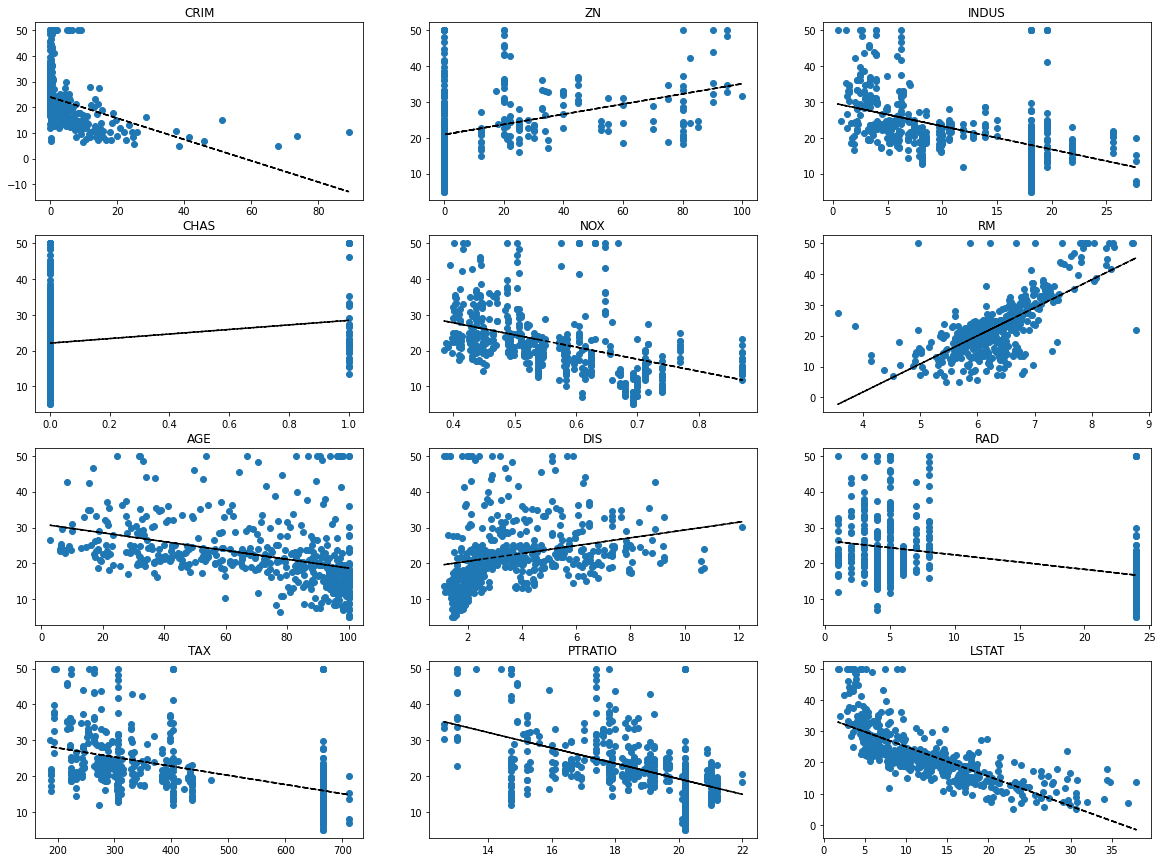

In [9]:
# Linearity:
# --------------------------------------
# linear regression needs the relationship between the independent and dependent variables to 
# be linear. It is also important to check for outliers since linear regression is sensitive 
# to outlier effects. 

# A straight line is placed through the data to represent the relationship our target has with 
# every predictor variable. This straight line should represent all points as good as possible

def plot_linearity(df, nrow, ncol, target):
    col = 0
    fig, axs = plt.subplots(nrow, ncol, figsize=(20,15))
    for i in range(nrow):
        for j in range(ncol):
            coef = np.polyfit(df.iloc[:,col], df[target], 1)
            poly1d_fn = np.poly1d(coef) 
            axs[i, j].plot(df.iloc[:,col], df[target], 'C0o', df.iloc[:,col], poly1d_fn(df.iloc[:,col]), '--k') 
            axs[i,j].set_title(df.iloc[:,col].name)
            col += 1

plot_linearity(df, 4, 3, 'MEDV')

**Comments:**

There is a **positive** linear relationship between the price of a house and the number of rooms it has. It also can be seem a **negative** relationship with the predictor LSTAT showing that where the populations of low-income is high, the house prices tend to be low.

There are other linear relationships between the target variable and the predictors AGE, DIS, PTRATIO, NOX. Outliers Can be affecting the magnitude of some relationships. 

In [10]:
# Multicollinearity:
# --------------------------------------
# Multicollinearity occurs when the independent variables are too highly correlated with each other. When it
# is present in the linear model, the coefficients that the model suggests are unreliable.
# 
# Variance Inflation Factor (VIF) is a measure of how much the variance of the estimated regression 
# coefficient X is "inflated" by the existence of correlation among the predictor variables in the model. 
# VIF of 1 to 5 indicates no Multicollinearity, from 5 to 10 moderate presents, 10 or more certainly is
# high multi-collinearity. 

# Note it's added a column of intercept/constant to the dataset before calculating the VIFs. This is because 
# the VIF function in python does not assume the intercept by default while calculating the VIFs. The target 
# variable has to be removed from the dataset

def multicollinearityTest(df):
      
    df = sm.add_constant(df)
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    print(vif)
    del vif

df1 = df.drop(columns = 'MEDV')  
multicollinearityTest(df1)

    feature         VIF
0     const  535.526619
1      CRIM    1.767486
2        ZN    2.298459
3     INDUS    3.987181
4      CHAS    1.071168
5       NOX    4.369093
6        RM    1.912532
7       AGE    3.088232
8       DIS    3.954037
9       RAD    7.445301
10      TAX    9.002158
11  PTRATIO    1.797060
12    LSTAT    2.870777


**Comments:**

There are two variables with a moderate factor of multicollinearity. The rest of the variables show no multicollinearity.

1. RAD : 7.44 - moderate 
2. TAX : 9.00 - moderate/high

### 4. Data Preprocessing

#### *a. Splitting dataset into target and predictors*

In [11]:
# Split dataset 
# --------------------------------------
# Split dataset into target variable and predictors

# target variable (House Price)
y = df.MEDV
# predictors (other variables)
X = df.drop(columns = ['MEDV'])


#### *b. Removing Outliers*

In [12]:
# Outlier Detection and Treatment
# --------------------------------------

# 1. Normal distribution with outliers
#       a. Columns: RM 
#       b. Detection method: Z-score: below mean-3*(sigma) or above mean+3*(sigma) are outliers
#       c. Treatment: Capping. Every outlier will be cap to its closer 3sigma value. 

def outliers_normalDist(df, ft):

    for i in ft:
        
        #calulating 3_sigma limits 
        upper_limit = df[ft].mean() + 3*df[ft].std()
        lower_limit = df[ft].mean() - 3*df[ft].std()

        #capping outliers
        df[ft] = np.where(df[ft] < lower_limit, lower_limit,
            np.where(df[ft] > upper_limit, upper_limit,
                df[ft]
            )
        )

# 2. Skewed distribution with outliers:
#       a. Columns: CRIM, ZN, DIS, PTRATIO, LSTAT 
#       b. Detection method: Inter-Quartile Range (IQR) proximity rule.
#       c. Treatment: Capping. Every outlier will be cap to its closer limit whisker (upper or lower limit)

def outliers_skewedDist(df, ft):

    for i in ft:
        
        #calculating percentiles values
        percentile25 = df[ft].quantile(0.25)
        percentile75 = df[ft].quantile(0.75)

        #calculating inter-quartile range
        iqr = percentile75 - percentile25

        #calculating whiskers limits
        lower_limit = percentile25 - 1.5 * iqr
        upper_limit = percentile75 + 1.5 * iqr

        #capping outliers
        df[ft] = np.where(df[ft] < lower_limit, lower_limit,
            np.where(df[ft] > upper_limit, upper_limit,
                df[ft]
            )
        )

outliers_normalDist(X, 'RM')
outliers_skewedDist(X, ['CRIM', 'ZN', 'DIS', 'PTRATIO', 'LSTAT'])


#### *c. Removing Multicollinearity*

In [13]:
# Multicollinearity Treatment
# --------------------------------------
# Method: Drop some of the correlated predictors, as from a practical point of view, there is no point in 
# keeping 2 very similar predictors in our model. 

X = X.drop(columns = 'RAD')
multicollinearityTest(X)


    feature         VIF
0     const  547.158211
1      CRIM    5.017859
2        ZN    2.408097
3     INDUS    3.813586
4      CHAS    1.058921
5       NOX    4.413005
6        RM    1.930936
7       AGE    3.102031
8       DIS    4.066176
9       TAX    5.720980
10  PTRATIO    1.776736
11    LSTAT    3.088346


Comments:

VIF factor has been dropped to 5 or less for the rest of the predictors after deleting the RAD variable from the training dataframe. Now, we can assume that multicollinearity has been removed between all the variables.

#### *d. Dataset normalization*

In [14]:
# Normalization
# --------------------------------------
# The goal of normalization is to change the values of numeric columns in the dataset to use a 
# common scale, without distorting differences in the ranges of values or losing information.
# The StandardScaler() is a function used to resize the distribution of values ​​so that the 
# mean of the observed values ​​is 0 and the standard deviation is 1. 

# Scaling and normalizing predictor variables
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Peak to Peak: new range of values for each feature
np.ptp(pd.DataFrame(X_norm, columns = X.columns), axis = 0)


CRIM       2.738098
ZN         2.600505
INDUS      3.980407
CHAS       3.940996
NOX        4.198228
RM         6.024094
AGE        3.452932
DIS        4.203279
TAX        3.112184
PTRATIO    4.108684
LSTAT      4.312834
dtype: float64

**Comments:**

All variables have been scaled to a similar range of values. This will help the models improve the processing time and their accuracy.
 

#### *e. Splitting dataset into training and testing datasets*

In [15]:
# train_test_split
# --------------------------------------
# Split arrays or matrices into random train and test subsets.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 75:25 dataframe train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 13)

print("train_test_split")
print("--------------------------------------")
print("Train -> X_train : " + str(X_train.shape) + " | y_train : " + str(y_train.shape))
print("Test  -> X_test  : " + str(X_test.shape) + " | y_test  : " + str(y_test.shape))


train_test_split
--------------------------------------
Train -> X_train : (379, 11) | y_train : (379,)
Test  -> X_test  : (127, 11) | y_test  : (127,)


### 5. Model Building, Training and Testing

#### a. *fuction for bulding trainig and testing* : 

In [16]:
# model performance evaluation
def model_Performance(model):
    
    # Training and testing prediction
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    # r-squered (r2)
    # Is a statistical measure of how close the data points are to the fitted regression line. 
    # Measures the amount of variance in the predictions explained by the dataset. 
    # 0% indicates that the model explains none of the variability. 100% indicates that the model 
    # explains all the variability.
    
    r2_train = metrics.r2_score(y_train, pred_train)  
    r2_test  = metrics.r2_score(y_test, pred_test)

    # mean squered error (MSE)
    # Mean squared error between the predicted and actual values. Is a measure of the quality of 
    # an estimator. Is always non-negative, and values closer to zero are better. 
    
    mse_train = metrics.mean_squared_error(y_train, pred_train)
    mse_test  = metrics.mean_squared_error(y_test, pred_test)

    # root mean squered error (RMSE) 
    # is a measure of how spread out these residuals are. In other words, it tells how 
    # concentrated the data is around the line of best fit. Lower value means best fit / 
    # Data is closer to the prediction.

    rmse_train = metrics.mean_squared_error(y_train, pred_train, squared = False)
    rmse_test  = metrics.mean_squared_error(y_test, pred_test, squared = False)

    # mean absolute error (MAE) 
    # The mean of the absolute errors. The absolute error is the absolute value of the 
    # difference between the forecasted value and the actual value. value can range from 
    # 0 to ∞ and are indifferent to the direction of errors. 
    # it's negatively-oriented score, which means lower values are better.

    mae_train = metrics.mean_absolute_error(y_train, pred_train)
    mae_test  = metrics.mean_absolute_error(y_test, pred_test)

    # mean absoluted precentage error (MAPE)
    # MAPE can be interpreted as the inverse of model accuracy, but more specifically as the average 
    # percentage difference between predictions and their intended targets in the dataset. 
    # For example, if your MAPE is 10% then your predictions are on average 10% away from the actual values 
    # they were aiming for.
    
    mape_train = metrics.mean_absolute_percentage_error(y_train, pred_train)
    mape_test  = metrics.mean_absolute_percentage_error(y_test, pred_test)

    # printing performance matrics
    print('Model Perfromance: ' + str(model))
    print("--------------------------------------")
    print("Train data set ->  r2_score: %0.2f  |    mse: %0.2f  |  rmse: %0.2f  |   mae: %0.2f |   mape: %0.2f" % (r2_train, mse_train, rmse_train, mae_train, mape_train))
    print("test data set  ->  r2_score: %0.2f  |    mse: %0.2f  |  rmse: %0.2f  |   mae: %0.2f |   mape: %0.2f" % (r2_test, mse_test, rmse_test, mae_test, mape_test))

# ploting feature's importance
def featureImportance_plot(model):
   
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by='Importance', ascending = False)

    #ploting feature importance chart
    plt.figure(figsize=(10, 5))
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title(str(model) + ' - Feature Importance')
    plt.xlabel('Coeficient Importance')


#### b. *Base Reggression Algorithims:* 

In [17]:
# Ridge
# --------------------------------------
# In this technique, we modify the residual sum of squares by adding the shrinkage quantity α*Σβ² 
# and use α as the tuning parameter that decides how much we want to penalize the flexibility of our model. 
# This technique is also called L2 regularization
# More info: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

# Model definition and fitting
rdg = Ridge(alpha = 0.5)
rdg.fit(X_train, y_train)

# Model Performance
model_Performance(rdg)


Model Perfromance: Ridge(alpha=0.5)
--------------------------------------
Train data set ->  r2_score: 0.72  |    mse: 23.22  |  rmse: 4.82  |   mae: 3.40 |   mape: 0.17
test data set  ->  r2_score: 0.74  |    mse: 23.38  |  rmse: 4.84  |   mae: 3.55 |   mape: 0.20


In [18]:
# Support Vector Regression (SVR) - Linear Kernel
# --------------------------------------
# Supervised learning algorithm that is used to predict discrete values. 
# The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is 
# the hyperplane that has the maximum number of points.

# Model definition and fitting
svrl = svm.SVR(kernel = "linear")
svrl.fit(X_train, y_train)

# Model Performance
model_Performance(svrl)


Model Perfromance: SVR(kernel='linear')
--------------------------------------
Train data set ->  r2_score: 0.67  |    mse: 27.03  |  rmse: 5.20  |   mae: 3.17 |   mape: 0.15
test data set  ->  r2_score: 0.72  |    mse: 25.16  |  rmse: 5.02  |   mae: 3.40 |   mape: 0.18


In [19]:
# Support Vector Regression (SVR) - rbf Kernel
# --------------------------------------

# Model definition and fitting
svrr = svm.SVR(kernel = "rbf")
svrr.fit(X_train, y_train)

# Model Performance
model_Performance(svrr)


Model Perfromance: SVR()
--------------------------------------
Train data set ->  r2_score: 0.69  |    mse: 25.50  |  rmse: 5.05  |   mae: 2.83 |   mape: 0.13
test data set  ->  r2_score: 0.69  |    mse: 28.19  |  rmse: 5.31  |   mae: 3.23 |   mape: 0.16


#### *c. Ensemble Regressor Algorithims:*

Model Perfromance: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
--------------------------------------
Train data set ->  r2_score: 1.00  |    mse: 0.00  |  rmse: 0.00  |   mae: 0.00 |   mape: 0.00
test data set  ->  r2_score: 0.89  |    mse: 10.04  |  rmse: 3.17  |   mae: 2.12 |   mape: 0.11


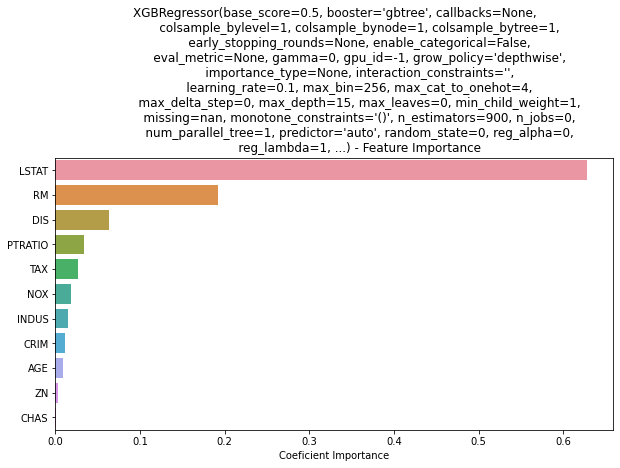

In [20]:
# XGBRegressor 
# --------------------------------------
# Is a type of gradient boosting model that uses tree-building techniques to predict its final value.
# Gradient boosting is a machine learning technique used in regression and classification tasks. It creates 
# a prediction model as an ensemble of other, weak prediction models, which are typically decision trees. 
# Essentially, how boosting works is by adding new models to correct the errors that previous ones made.
# More info: https://xgboost.readthedocs.io/en/stable/

# Model definition and fitting
xgbr = XGBRegressor(n_estimators = 900, max_depth = 15, learning_rate = 0.1)
xgbr.fit(X_train, y_train)

# Model Performance
model_Performance(xgbr)
featureImportance_plot(xgbr)

Model Perfromance: RandomForestRegressor(max_depth=4, n_estimators=200)
--------------------------------------
Train data set ->  r2_score: 0.91  |    mse: 7.10  |  rmse: 2.66  |   mae: 2.08 |   mape: 0.11
test data set  ->  r2_score: 0.85  |    mse: 13.61  |  rmse: 3.69  |   mae: 2.52 |   mape: 0.13


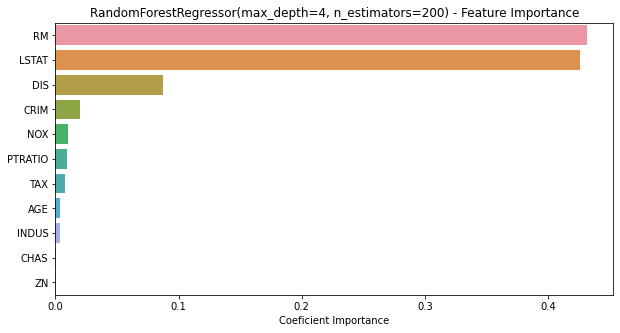

In [21]:
# RandomForestRegressor 
# --------------------------------------
# Random forest is an ensemble learning algorithm based on decision tree learners. The estimator 
# fits multiple decision trees on randomly extracted subsets from the dataset and averages their 
# prediction.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2)
rf.fit(X_train, y_train)

# Model Performance
model_Performance(rf)
featureImportance_plot(rf)

### 6. Validation

#### *a. Cross validating models performance*

In [22]:
# Cross-validation:
# --------------------------------------
# Cross-validation is a resampling method that uses n portions of the data to test and train 
# a model on n iterations. It is mainly used in settings where the goal is prediction, 
# and one wants to estimate how accurately a predictive model will perform in practice.
# More info: https://scikit-learn.org/stable/modules/cross_validation.html

print("Cross-validation")
print("--------------------------------------")
for regression_model, label in zip([rdg, svrl, svrr, xgbr, rf], ['RidgeRegressor','SVR(linear)', 'SVR(rbf)', 'XGBRegressor', 'RandomForestRegressor']):
    scores = cross_val_score(regression_model, X_train, y_train, scoring = 'r2', cv = 5)
    print("r2_score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))    

Cross-validation
--------------------------------------
r2_score: 0.69 (+/- 0.07) [RidgeRegressor]
r2_score: 0.66 (+/- 0.09) [SVR(linear)]
r2_score: 0.63 (+/- 0.04) [SVR(rbf)]
r2_score: 0.87 (+/- 0.03) [XGBRegressor]
r2_score: 0.84 (+/- 0.04) [RandomForestRegressor]


#### *b. Residual Calculation*

In [23]:
# Residuals: 
# --------------------------------------

# Predicting house prices from best performance model
y_pred = rf.predict(X_test)

def residuals_Calculation(y_pred):

    #calculating residuals
    residuals = y_test - y_pred
    #standardizing residuals
    standardized_residuals = (residuals - residuals.mean()) / residuals.std()
    
    return standardized_residuals

z_residuals = residuals_Calculation(y_pred)

#### *c. Validating Homoscedasticity*

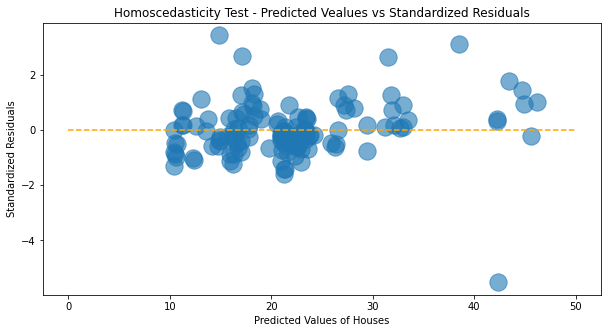

In [24]:
# Homoscedasticity: 
# --------------------------------------
# The residuals have a constant variance

plt.figure(figsize=(10,5))
plt.hlines(y=0.0, xmin = 0, xmax = 50, color='orange', linestyle='--')
plt.scatter(y_pred, z_residuals, color = 'C0', alpha = 0.6, s = 300)
plt.title('Homoscedasticity Test - Predicted Vealues vs Standardized Residuals')
plt.xlabel('Predicted Values of Houses')
plt.ylabel('Standardized Residuals')
plt.show()

**Comments:**

In general residuals are spread across equally without a prominent pattern, tending to cluster towards the middle of the plot. This means the residuals have a constant variance and the Homoscedasticity condition is met.
* All predictions above the line were too high and all those below the line were too low. Also, there are still some outliers to take care of.

#### *d. Validating Normality*

Text(0.5, 0, 'Standardized Residuals Distribution')

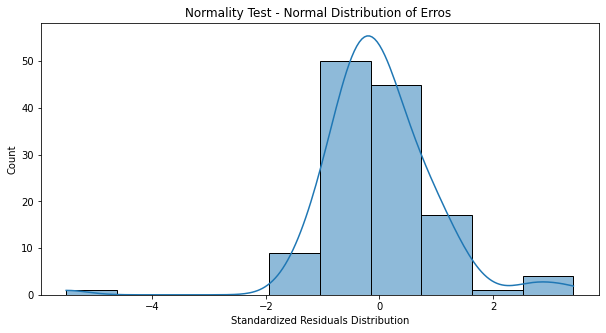

In [25]:
# Normal distribution of the error:
# --------------------------------------
# Error epsilon must be normally distributed

plt.figure(figsize=(10,5))
plt.title('Normality Test - Normal Distribution of Erros ')
sns.histplot(data = df, x = z_residuals, kde = True, bins = 10)
plt.xlabel('Standardized Residuals Distribution' )


**Comments:**

Residuals follow a normal distribution there for the Linear Regression Normality assumption is also met.

### 7. Results

**Random forest (rf)** Shows good and consistent performance results as shown:

1. Train data set ->  r2_score: 0.91  |    mse: 7.15   |  rmse: 2.67  |   mae: 2.08 |   mape: 0.11
2. test data set ->  r2_score: 0.84  |    mse: 13.93  |  rmse: 3.73  |   mae: 2.55 |   mape: 0.14
3. Cross Validation Accurracy (r2_score): 0.84 (+/- 0.04)

This model explains **84% (r2_score)** of the variability in the price through its independent variables and can make predictions within **~14% (mape)** of the price value on average. 

* Percentage lower-status population (LSTAT): is the most significant feature to determine the price of a house when using XGBOOST as the regressor model. This feature is negatively correlated with the price based on, suburbs with higher percentage of LSTAT are areas where house income is low therefore houses tend to be less well-off and not expensive.
* Average number of rooms per dwelling (RM): the second most important feature, positive correlated to the price of a house, shows that while bigger is the number of rooms in a house higher is its price.

* Distance to employment centers (DIS):  is also negative correlated to the price of a house, the reason is that suburbs far away from employment centers are less expensive. This is opposite to old buildings close to the city center which are areas of prime real estate for the convenience of proximity to work offices, markets, and entertainment facilities.

**Xgboost** is the second-best option in cross validation performance (r2_score) - 0.87 (+/- 0.03) but its overfitting, so results may be inconsistent.

Train data set ->  r2_score: 1.00  |    mse: 0.00   |  rmse: 0.00  |   mae: 0.00 |   mape: 0.00
test data set  ->  r2_score: 0.89  |    mse: 10.04  |  rmse: 3.17  |   mae: 2.12 |   mape: 0.11



#### *Results visualization*

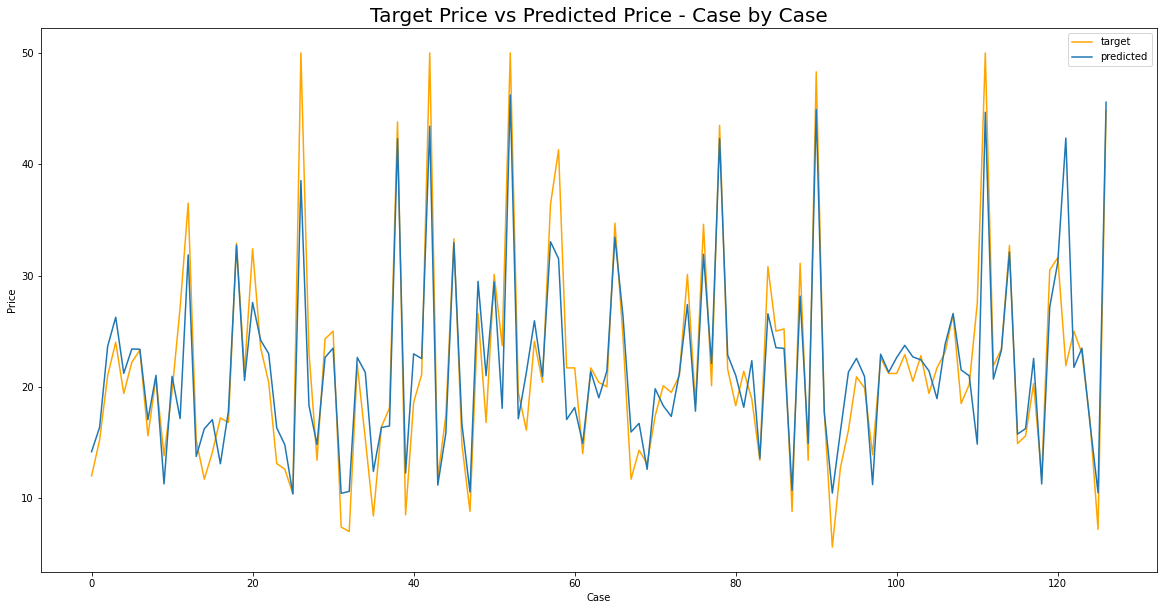

In [26]:
#Target Price vs Predicted Price - Case by Case
# --------------------------------------
plt.figure(figsize=(20,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="target", color = 'orange')
plt.plot(x_ax, y_pred, label="predicted", color = 'C0')
plt.title("Target Price vs Predicted Price - Case by Case", fontsize = 20)
plt.ylabel("Price")
plt.xlabel("Case")
plt.legend()
plt.show()

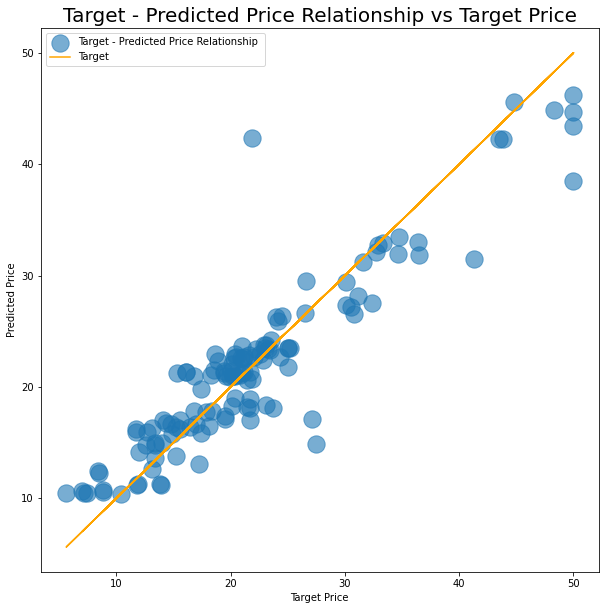

In [27]:
# Predicted Price Differece vs Target Price
# --------------------------------------
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color = 'C0', alpha = 0.6, s = 300, label = "Target - Predicted Price Relationship ")
plt.plot(y_test, y_test, color = 'orange', label = "Target")
plt.title("Target - Predicted Price Relationship vs Target Price", fontsize = 20)
plt.ylabel("Predicted Price")
plt.xlabel("Target Price")
plt.legend()
plt.show()

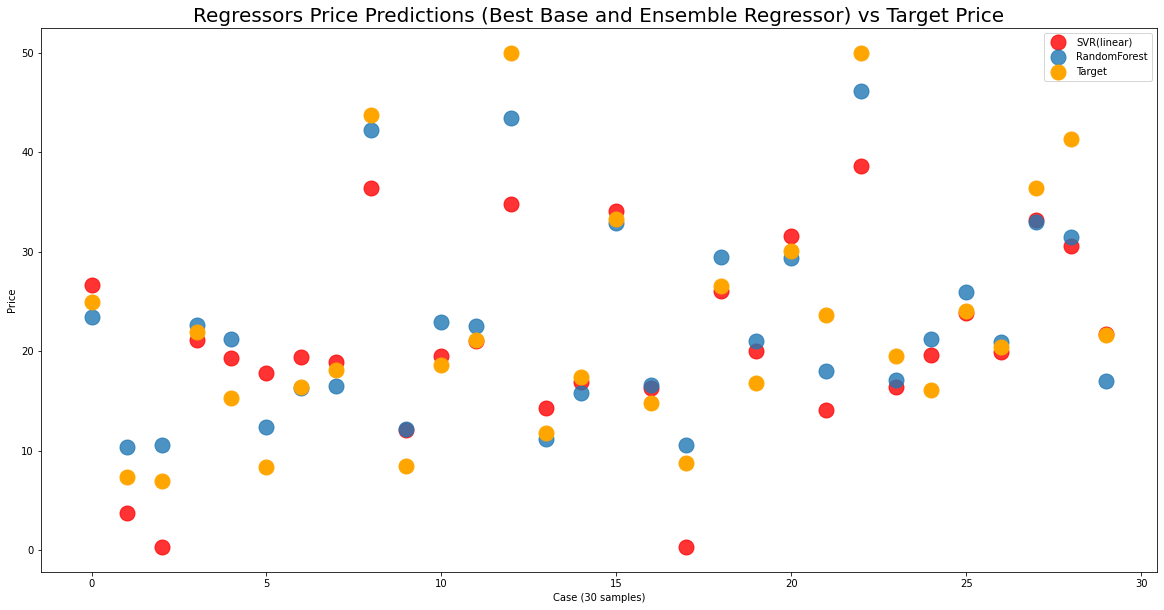

In [28]:
# Regeressors Price Predictions vs Target Price
# --------------------------------------
xt = X_test[30:60]
yt = np.array(y_test[30:60])

pred1 = svrl.predict(xt)
pred2 = rf.predict(xt)

plt.figure(figsize=(20,10))
plt.plot(pred1, "o", color = 'red',     label = "SVR(linear)",  ms = 15, alpha = 0.8)
plt.plot(pred2, "o", color = 'C0',      label = "RandomForest", ms = 15, alpha = 0.8)
plt.plot(yt,    "o", color = 'orange',  label = "Target",       ms = 15)

plt.title("Regressors Price Predictions (Best Base and Ensemble Regressor) vs Target Price" , fontsize = 20)
plt.ylabel("Price")
plt.xlabel("Case (30 samples)")
plt.legend()
plt.show()

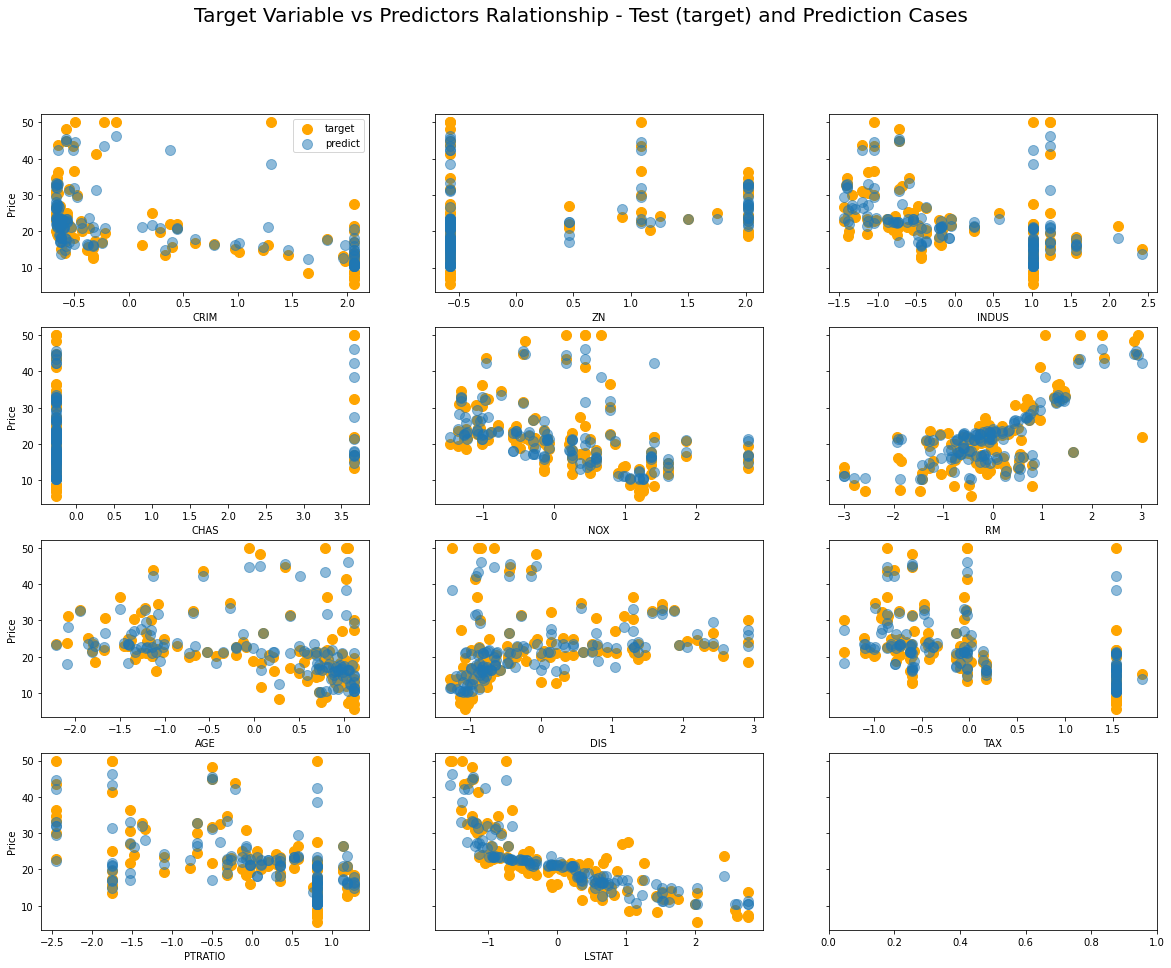

In [29]:
# Target Variable vs Predictors Ralationship - Test vs Prediction Cases
# --------------------------------------

col = 0
X_features = X.columns

fig, ax = plt.subplots(4, 3, figsize = (20,15), sharey = True)
for i in range(4):
    ax[i,0].set_ylabel("Price")
    for j in range(3):
        if col > len(X_features) - 1: 
            break
        ax[i,j].scatter(X_test[:,col], y_test, label = 'target', color = 'orange', alpha = 1, s = 100)
        ax[i,j].set_xlabel(X_features[col])
        ax[i,j].scatter(X_test[:,col], y_pred, label = 'predict', color = 'C0', alpha = 0.5, s = 100)
        col += 1
        
ax[0,0].legend(loc = 'best')
fig.suptitle("Target Variable vs Predictors Ralationship - Test (target) and Prediction Cases", fontsize = 20)
plt.show()

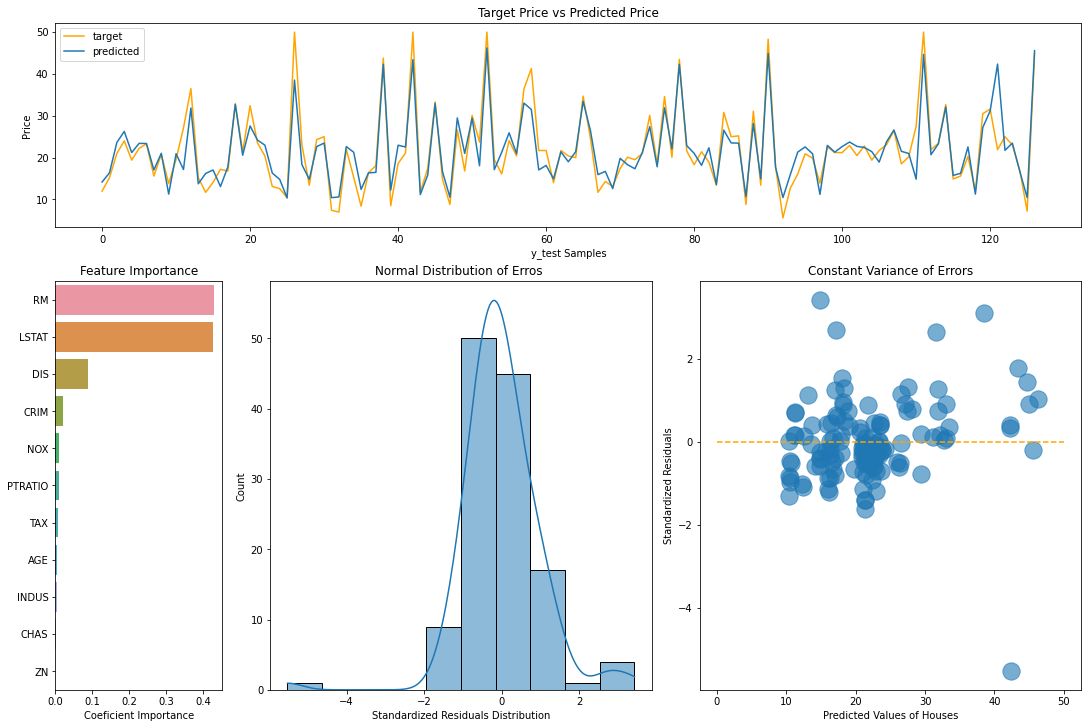

In [30]:
# Summary Grid Chart
# --------------------------------------

fig = plt.figure(constrained_layout=True, figsize = (15,10))
gs = GridSpec(3, 5, figure=fig)

# --------------------------------------
ax1 = fig.add_subplot(gs[0, :])

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="target", color = 'orange')
plt.plot(x_ax, y_pred, label="predicted", color = 'C0')
plt.title("Target Price vs Predicted Price")
plt.ylabel("Price")
plt.xlabel("y_test Samples")
plt.legend()

# --------------------------------------
ax2 = fig.add_subplot(gs[1:, 0:1])

def featureImportance_grid_plot(model):
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by='Importance', ascending = False)

    #ploting feature importance chart
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title('Feature Importance')
    plt.xlabel('Coeficient Importance')

featureImportance_grid_plot(rf)

# --------------------------------------
ax3 = fig.add_subplot(gs[1:, 1:3])

plt.title('Normal Distribution of Erros ')
sns.histplot(data = df, x = z_residuals, kde = True, bins = 10)
plt.xlabel('Standardized Residuals Distribution' )

# --------------------------------------
ax4 = fig.add_subplot(gs[1:, 3:])

plt.hlines(y=0.0, xmin = 0, xmax = 50, color='orange', linestyle='--')
plt.scatter(y_pred, z_residuals, color = 'C0', alpha = 0.6, s = 300)
plt.title('Constant Variance of Errors')
plt.xlabel('Predicted Values of Houses')
plt.ylabel('Standardized Residuals')

#fig.suptitle("Best Model Summary")
fig.savefig('./imgs/summary_plt.jpg')

plt.show()

EOF